In [0]:
pip install konlpy

     |████████████████████████████████| 19.4MB 57.7MB/s 
     |████████████████████████████████| 2.7MB 40.2MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from gensim.test.utils import common_texts,get_tmpfile
from gensim.models import Word2Vec
import pandas as pd
import numpy as np

model = Word2Vec.load("./drive/My Drive/word2vec/word2vec.model")
word_vocabs = model.wv
word_list = ['<s>'] + list(word_vocabs.vocab.keys())
word_to_dict = { word:index for index,word in enumerate(word_list)}
embeding_weights = model.wv.syn0
pad_word = np.zeros((100)).reshape((-1,100))
embeding_weights = np.concatenate((pad_word,embeding_weights))
weights_matrix = embeding_weights


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  # Remove the CWD from sys.path while we load stuff.


In [0]:

import csv
from konlpy.tag import Kkma
f = open("경제.csv",'r',encoding = 'utf16')
rdr = csv.reader(f)
title_date = []#각 뉴스별 날짜 저장
title = []#각 뉴스별 제목 저장
max_len = 0

kkma = Kkma()
for i,line in enumerate(rdr):
    if i == 0:
        continue
    tit = kkma.morphs(line[1])
    max_len = max_len if max_len > len(tit) else len(tit)
    title_date.append(line[0])
    title.append(tit)
f.close()

/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [0]:
for i in range(len(title)):
    for j in range(len(title[i])):
      if title[i][j] in word_to_dict:
        title[i][j] = word_to_dict[title[i][j]]
      else:
        title[i][j] = word_to_dict['<s>']

In [0]:
print(title)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
date_set = set(title_date)
date_set = sorted(date_set)
dic_date_title = {day : [] for day in date_set} 
# 날짜와 그에대한 뉴스제목으로 연결된 딕셔너리

idx = 0
for day in date_set:
    for i in range(idx,len(title_date)):
        if day != title_date[i]:
            idx  += 1
            break
        dic_date_title[day].append(title[i])
        idx  += 1

In [0]:
kospi_data = pd.read_csv("코스피지수 내역 (2).csv")

In [0]:
the_date = kospi_data["날짜"].to_list()

In [0]:
for i in range(len(the_date)):
    day = the_date[i][:4] + the_date[i][6:8] + the_date[i][10:12] 
    the_date[i] = day

In [0]:
kospi_data["날짜"] = the_date

In [0]:
import re

for i in range(len(kospi_data)):
    kospi_data.iloc[i]["현재가"] = float(re.sub(',','',kospi_data.iloc[i]["현재가"]))
    kospi_data.iloc[i]["오픈"] = float(re.sub(',','',kospi_data.iloc[i]["오픈"]))
    kospi_data.iloc[i]["고가"] = float(re.sub(',','',kospi_data.iloc[i]["고가"]))
    kospi_data.iloc[i]["저가"] = float(re.sub(',','',kospi_data.iloc[i]["저가"]))
    k_or_m = 0
    if kospi_data.iloc[i]["거래량"][-1] == 'M' :
        k_or_m = 1000000
    elif kospi_data.iloc[i]["거래량"][-1] == 'K':
        k_or_m = 1000
    else:
        k_or_m = 1000000000
    kospi_data.iloc[i]["거래량"] = float(kospi_data.iloc[i]["거래량"][:-1])*k_or_m
    kospi_data.iloc[i]["변동 %"] = float(kospi_data.iloc[i]["변동 %"][:-1])
# 코스피 가격중 거래량 표현을 변환하기 위한 코드

In [0]:
display(kospi_data)

,날짜,현재가,오픈,고가,저가,거래량,변동 %
0,20191115,2162.18,2137.96,2165.02,2135.26,5.5625e+08,1.07
1,20191114,2139.23,2127.54,2139.23,2121.32,5.2111e+08,0.79
2,20191113,2122.45,2132.48,2133.37,2118.67,6.6436e+08,-0.86
3,20191112,2140.92,2131.26,2140.94,2121.8,6.1043e+08,0.79
4,20191111,2124.09,2139.07,2139.07,2119.07,6.1727e+08,-0.61
...,...,...,...,...,...,...,...
2432,20100108,1695.26,1694.06,1695.26,1668.84,3.7995e+08,0.7
2433,20100107,1683.45,1702.92,1707.9,1683.45,4.624e+08,-1.28
2434,20100106,1705.32,1697.88,1706.89,1696.1,4.2604e+08,0.87
2435,20100105,1690.62,1701.62,1702.39,1686.45,4.0885e+08,-0.33


In [0]:
kospi_num = kospi_data.loc[:,"현재가":"변동 %"].to_numpy() 
#날짜 데이터를 지우기 위한 방법 

In [0]:
from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler()
kospi_data.loc[:,"오픈":"변동 %"] = stand_scaler.fit_transform(kospi_data.loc[:,'오픈':'변동 %'])

#코스피 가격 데이터를 노멀라이징

In [0]:
display(kospi_data)

,날짜,현재가,오픈,고가,저가,거래량,변동 %
0,20191115,2162.18,0.53411,0.63108,0.578584,1.3875,1.13477
1,20191114,2139.23,0.480179,0.497443,0.506467,1.10216,0.833704
2,20191113,2122.45,0.505747,0.467078,0.492758,2.26537,-0.940466
3,20191112,2140.92,0.499433,0.506304,0.50895,1.82745,0.833704
4,20191111,2124.09,0.539855,0.496614,0.494827,1.88299,-0.671652
...,...,...,...,...,...,...,...
2432,20100108,1695.26,-1.76336,-1.80309,-1.83439,-0.0440905,0.736931
2433,20100107,1683.45,-1.71751,-1.7376,-1.7588,0.625419,-1.39207
2434,20100106,1705.32,-1.74359,-1.74283,-1.69336,0.330169,0.919724
2435,20100105,1690.62,-1.72424,-1.76615,-1.74328,0.190583,-0.370581


In [0]:
input_title = {}
for title in dic_date_title:
    step_title = []
    first_data,second_data,third_data,fourth_data = [],[],[],[]
    for i in range(5):
        first_data += dic_date_title[title][0 + 5*i]
        second_data += dic_date_title[title][1 + 5*i]
        third_data += dic_date_title[title][2 + 5*i]
        fourth_data += dic_date_title[title][3 + 5*i]
    step_title = [first_data,second_data,third_data,fourth_data]
    input_title.update({title : step_title})

In [0]:
for_pad_data = [ti for day in input_title for ti in input_title[day]]

In [0]:
max_len = 0
for ti in for_pad_data:
    max_len = max_len if max_len > len(ti) else len(ti)

In [0]:
input_title = {}
for title in dic_date_title:
    step_title = []
    first_data,second_data,third_data,fourth_data = [],[],[],[]
    for i in range(5):
        first_data += dic_date_title[title][0 + 5*i]
        second_data += dic_date_title[title][1 + 5*i]
        third_data += dic_date_title[title][2 + 5*i]
        fourth_data += dic_date_title[title][3 + 5*i]
    
    first_data += [0]*(max_len - len(first_data))
    second_data += [0] * (max_len - len(second_data))
    third_data += [0] * (max_len - len(third_data))
    fourth_data += [0] * (max_len - len(fourth_data))
    
    step_title = [first_data,second_data,third_data,fourth_data]
    input_title.update({title : step_title})
# first ~ fourth로 데이터를 증폭하기 위한 방법: 모든 날짜는 [0,5,10,15,20,25] [1,6,11,16,21,27,...] ... 로 나누어져 있다.

In [0]:
label = kospi_data.loc[:,list(kospi_data.columns)].values[:,:2] # kospi data와 현재가로 이루어진 array

In [0]:
kospi_output_data = list(dic_date_title.keys())
k_data = kospi_data.values
k_data = {step_data[0]:step_data[1:]  for step_data in k_data}
to_kospi_input_dic = {}
for today in kospi_output_data:
  if today in k_data:
    to_kospi_input_dic.update({today:k_data[today]})
  else:
    to_kospi_input_dic.update({today : np.zeros(shape = 6,dtype = np.float32)})

In [0]:
kospi_output_data = {ko[0]:ko[1] for ko in label}

In [0]:
input_title_data = []
input_kospi_data = []
output_kospi_data = []
the_date = list(dic_date_title.keys())

for i,day in enumerate(kospi_output_data):
    _input1 = []
    _input2 = []
    _input3 = []
    _input4 = []
    k_input1 = []
    k_input2 = []
    k_input3 = []
    k_input4 = []

    kospi_input = []
    index = the_date.index(day)
    for d in list(dic_date_title.keys())[index-3:index]:
        _input1.append(input_title[d][0])
        _input2.append(input_title[d][1])
        _input3.append(input_title[d][2])
        _input4.append(input_title[d][3])
        k_input1.append(to_kospi_input_dic[d])
        k_input2.append(to_kospi_input_dic[d])
        k_input3.append(to_kospi_input_dic[d])
        k_input4.append(to_kospi_input_dic[d])

    output_kospi_data.append(kospi_output_data[day])
    output_kospi_data.append(kospi_output_data[day])
    output_kospi_data.append(kospi_output_data[day])
    output_kospi_data.append(kospi_output_data[day])
    input_kospi_data.append(k_input1)
    input_kospi_data.append(k_input2)
    input_kospi_data.append(k_input3)
    input_kospi_data.append(k_input4)
    input_title_data.append(_input1)
    input_title_data.append(_input2)
    input_title_data.append(_input3)
    input_title_data.append(_input4)
    #input_kospi_data.append(kospi_input*4)
#     output_kospi_data = []

In [0]:
input_title_data = np.array(input_title_data)
output_kospi_data = np.array(output_kospi_data)
input_kospi_data = np.array(input_kospi_data)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_title_data, output_kospi_data, test_size=0.2, random_state=42)
ko_train,ko_test = train_test_split(input_kospi_data, random_state=42, test_size=0.2)

In [0]:
display(x_train.shape)

(7798, 3, 250)

In [0]:
print(x_train[0])

[[ 3653    73   982   161   855  3653     7    73   115   141   365  6296
   2247   498   132 14386   137  8268  3807 24169     0   338    29     0
  38508  1943  2244    17     0   591  9203    62   498     0     0  1666
     53    11     0  1293   302   178    32  3119  3134 20002    29  5189
   9825  5250  2294     0 11854 12131   404  2826     0  5282     0   873
   5701 12299  1645   115     0  7917 24619   838     0   443  1179     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0 

In [0]:
from keras.layers import GRU, Dense, Concatenate, Embedding, Flatten, Input, Dropout, Lambda,RepeatVector
from keras.models import Model
from keras.callbacks import Callback

title_input = Input((3,250,))
kospi_input = Input((3,6,))

first_day_input = Lambda(lambda x : x[:,0])(title_input)
second_day_input = Lambda(lambda x : x[:,1])(title_input)
third_day_input = Lambda(lambda x : x[:,2])(title_input)
repeatvec = RepeatVector(250)

first_day_kospi = repeatvec(Lambda(lambda x : x[:,0])(kospi_input))
second_day_kospi = repeatvec(Lambda(lambda x : x[:,1])(kospi_input))
third_day_kospi = repeatvec(Lambda(lambda x : x[:,2])(kospi_input))

embedding_layer = Embedding(len(word_to_dict),100, weights = [weights_matrix], trainable = True)
print(embedding_layer)
embedding_first_day = embedding_layer(first_day_input)
embedding_second_day = embedding_layer(second_day_input)
embedding_third_day = embedding_layer(third_day_input)


print(title_input[0],'\n',title_input[1],'\n',title_input[2],'\n')
print(embedding_first_day,'\n',embedding_second_day,'\n',embedding_third_day)
first_gru_output = GRU(128,return_sequences = True)(embedding_first_day)
second_gru_output = GRU(128,return_sequences = True)(embedding_second_day)
third_gru_output = GRU(128, return_sequences = True)(embedding_third_day)

first_gru_output = GRU(64,return_sequences = True)(first_gru_output)
second_gru_output = GRU(64,return_sequences = True)(second_gru_output)
third_gru_output = GRU(64,return_sequences = True)(third_gru_output)

first_gru_output = Concatenate()([first_gru_output,first_day_kospi])
second_gru_output = Concatenate()([second_gru_output,second_day_kospi])
third_gru_output = Concatenate()([third_gru_output, third_day_kospi])


print('\n',first_gru_output,'\n',second_gru_output,'\n',third_gru_output,'\n')
flatten_first_gru = Flatten()(first_gru_output)
flatten_second_gru = Flatten()(second_gru_output)
flatten_third_gru = Flatten()(third_gru_output)
print('\n',flatten_first_gru,'\n',flatten_second_gru,'\n',flatten_third_gru,'\n')

first_dense_output = Dense(200,activation = 'relu')(flatten_first_gru)
second_dense_output = Dense(200,activation = 'relu')(flatten_second_gru)
third_dense_output = Dense(200,activation = 'relu')(flatten_third_gru)
print('\n',first_dense_output,'\n',second_dense_output,'\n',third_dense_output,'\n')

concat_output = Concatenate()([first_dense_output,second_dense_output,third_dense_output])
concat_dense = Dense(200,activation = 'relu')(concat_output)

last_output = Dense(1,activation = 'linear')(concat_dense)
print('\n',concat_output,'\n',concat_dense,'\n',last_output,'\n')

Tensor("strided_slice_3:0", shape=(3, 250), dtype=float32) 
 Tensor("strided_slice_4:0", shape=(3, 250), dtype=float32) 
 Tensor("strided_slice_5:0", shape=(3, 250), dtype=float32) 

Tensor("embedding_3/embedding_lookup/Identity:0", shape=(?, 250, 100), dtype=float32) 
 Tensor("embedding_3_1/embedding_lookup/Identity:0", shape=(?, 250, 100), dtype=float32) 
 Tensor("embedding_3_2/embedding_lookup/Identity:0", shape=(?, 250, 100), dtype=float32)

 Tensor("concatenate_5/concat:0", shape=(?, 250, 70), dtype=float32) 
 Tensor("concatenate_6/concat:0", shape=(?, 250, 70), dtype=float32) 
 Tensor("concatenate_7/concat:0", shape=(?, 250, 70), dtype=float32) 


 Tensor("flatten_4/Reshape:0", shape=(?, ?), dtype=float32) 
 Tensor("flatten_5/Reshape:0", shape=(?, ?), dtype=float32) 
 Tensor("flatten_6/Reshape:0", shape=(?, ?), dtype=float32) 


 Tensor("dense_6/Relu:0", shape=(?, 200), dtype=float32) 
 Tensor("dense_7/Relu:0", shape=(?, 200), dtype=float32) 
 Tensor("dense_8/Relu:0", shape=(?, 2

In [0]:
from keras.layers import GRU, Dense, Concatenate, Embedding, Flatten, Input, Dropout, Lambda,RepeatVector
from keras.models import Model
from keras.callbacks import Callback

title_input = Input((3,250,))
kospi_input = Input((3,6,))

first_day_input = Lambda(lambda x : x[:,0])(title_input)
second_day_input = Lambda(lambda x : x[:,1])(title_input)
third_day_input = Lambda(lambda x : x[:,2])(title_input)

embedding_layer = Embedding(len(word_to_dict),100,weights = [weights_matrix])

embedding_first_day = embedding_layer(first_day_input)
embedding_second_day = embedding_layer(second_day_input)
embedding_third_day = embedding_layer(third_day_input)


print(title_input[0],'\n',title_input[1],'\n',title_input[2],'\n')
print(embedding_first_day,'\n',embedding_second_day,'\n',embedding_third_day)
first_gru_output = GRU(128,return_sequences = True)(embedding_first_day)
second_gru_output = GRU(128,return_sequences = True)(embedding_second_day)
third_gru_output = GRU(128, return_sequences = True)(embedding_third_day)

# first_gru_output = GRU(64,return_sequences = True)(first_gru_output)
# second_gru_output = GRU(64,return_sequences = True)(second_gru_output)
# # third_gru_output = GRU(64,return_sequences = True)(third_gru_output)

# first_gru_output = Concatenate()([first_gru_output,first_day_kospi])
# second_gru_output = Concatenate()([second_gru_output,second_day_kospi])
# third_gru_output = Concatenate()([third_gru_output, third_day_kospi])


print('\n',first_gru_output,'\n',second_gru_output,'\n',third_gru_output,'\n')
flatten_first_gru = Flatten()(first_gru_output)
flatten_second_gru = Flatten()(second_gru_output)
flatten_third_gru = Flatten()(third_gru_output)
print('\n',flatten_first_gru,'\n',flatten_second_gru,'\n',flatten_third_gru,'\n')

first_dense_output = Dense(200,activation = 'relu')(flatten_first_gru)
second_dense_output = Dense(200,activation = 'relu')(flatten_second_gru)
third_dense_output = Dense(200,activation = 'relu')(flatten_third_gru)
print('\n',first_dense_output,'\n',second_dense_output,'\n',third_dense_output,'\n')

concat_output = Concatenate()([first_dense_output,second_dense_output,third_dense_output])
concat_dense = Dense(200,activation = 'relu')(concat_output)

last_output = Dense(1,activation = 'linear')(concat_dense)
print('\n',concat_output,'\n',concat_dense,'\n',last_output,'\n')

Tensor("strided_slice_6:0", shape=(3, 250), dtype=float32) 
 Tensor("strided_slice_7:0", shape=(3, 250), dtype=float32) 
 Tensor("strided_slice_8:0", shape=(3, 250), dtype=float32) 

Tensor("embedding_4/embedding_lookup/Identity:0", shape=(?, 250, 100), dtype=float32) 
 Tensor("embedding_4_1/embedding_lookup/Identity:0", shape=(?, 250, 100), dtype=float32) 
 Tensor("embedding_4_2/embedding_lookup/Identity:0", shape=(?, 250, 100), dtype=float32)

 Tensor("gru_13/transpose_1:0", shape=(?, ?, 128), dtype=float32) 
 Tensor("gru_14/transpose_1:0", shape=(?, ?, 128), dtype=float32) 
 Tensor("gru_15/transpose_1:0", shape=(?, ?, 128), dtype=float32) 


 Tensor("flatten_7/Reshape:0", shape=(?, ?), dtype=float32) 
 Tensor("flatten_8/Reshape:0", shape=(?, ?), dtype=float32) 
 Tensor("flatten_9/Reshape:0", shape=(?, ?), dtype=float32) 


 Tensor("dense_11/Relu:0", shape=(?, 200), dtype=float32) 
 Tensor("dense_12/Relu:0", shape=(?, 200), dtype=float32) 
 Tensor("dense_13/Relu:0", shape=(?, 200), d

In [0]:
model = Model([title_input],last_output)
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [0]:
display(y_train)

array([1881.24, 2000.37, 2031.64, ..., 2008.33, 2010.  , 1817.65])

In [0]:
from keras.callbacks import Callback
model.fit([x_train],y_train,batch_size = 128, epochs = 5, validation_split = 0.2)

Train on 6238 samples, validate on 1560 samples
Epoch 1/5
6238/6238 [==============================] - 61s 10ms/step - loss: 12859.8083 - val_loss: 19920.6536
Epoch 2/5
6238/6238 [==============================] - 61s 10ms/step - loss: 8909.3812 - val_loss: 20408.0425
Epoch 3/5
6238/6238 [==============================] - 61s 10ms/step - loss: 5871.6556 - val_loss: 19809.9024
Epoch 4/5
6238/6238 [==============================] - 61s 10ms/step - loss: 3698.4890 - val_loss: 19882.4073
Epoch 5/5
6238/6238 [==============================] - 61s 10ms/step - loss: 2175.0904 - val_loss: 20042.3562


In [0]:
np.sqrt(model.evaluate([x_test],y_test))

1950/1950 [==============================] - 29s 15ms/step


139.50618852444714

In [0]:
print('model 4 :',np.sqrt(model.evaluate([x_test,ko_test],y_test)))

1950/1950 [==============================] - 55s 28ms/step
model 4 : 33.74994769265667


In [0]:
np.sqrt(3902.6542)

62.471226976905136

In [0]:
import pandas as pd
import numpy as np
import csv

In [0]:
kospi = pd.read_csv("코스피지수 내역 (2).csv")

In [0]:
#kospi.날짜[:4] + kospi.날짜[6:8] + kospi.날짜[10:12]
day = kospi.iloc[:,0].to_list()
for i in range(len(day)):
    day[i] = day[i][:4] + day[i][6:8] + day[i][10:12]

In [0]:
kospi.iloc[:,0] = day

In [0]:
kospi_range = kospi.iloc[:,-1].to_numpy()
print(kospi_range)
for i in range(len(kospi_range)):
    kospi_range[i] = kospi_range[i][:-1]

['1.07%' '0.79%' '-0.86%' ... '0.87%' '-0.33%' '0.79%']


In [0]:
import re

for i in range(len(kospi)):
    kospi.iloc[i]["현재가"] = float(re.sub(',','',kospi.iloc[i]["현재가"]))
    kospi.iloc[i]["오픈"] = float(re.sub(',','',kospi.iloc[i]["오픈"]))
    kospi.iloc[i]["고가"] = float(re.sub(',','',kospi.iloc[i]["고가"]))
    kospi.iloc[i]["저가"] = float(re.sub(',','',kospi.iloc[i]["저가"]))
    k_or_m = 0
    if kospi.iloc[i]["거래량"][-1] == 'M' :
        k_or_m = 1000000
    elif kospi.iloc[i]["거래량"][-1] == 'K':
        k_or_m = 1000
    else:
        k_or_m = 1000000000
    kospi.iloc[i]["거래량"] = float(kospi.iloc[i]["거래량"][:-1])*k_or_m
    kospi.iloc[i]["변동 %"] = float(kospi.iloc[i]["변동 %"][:-1])
# 코스피 가격중 거래량 표현을 변환하기 위한 코드

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text

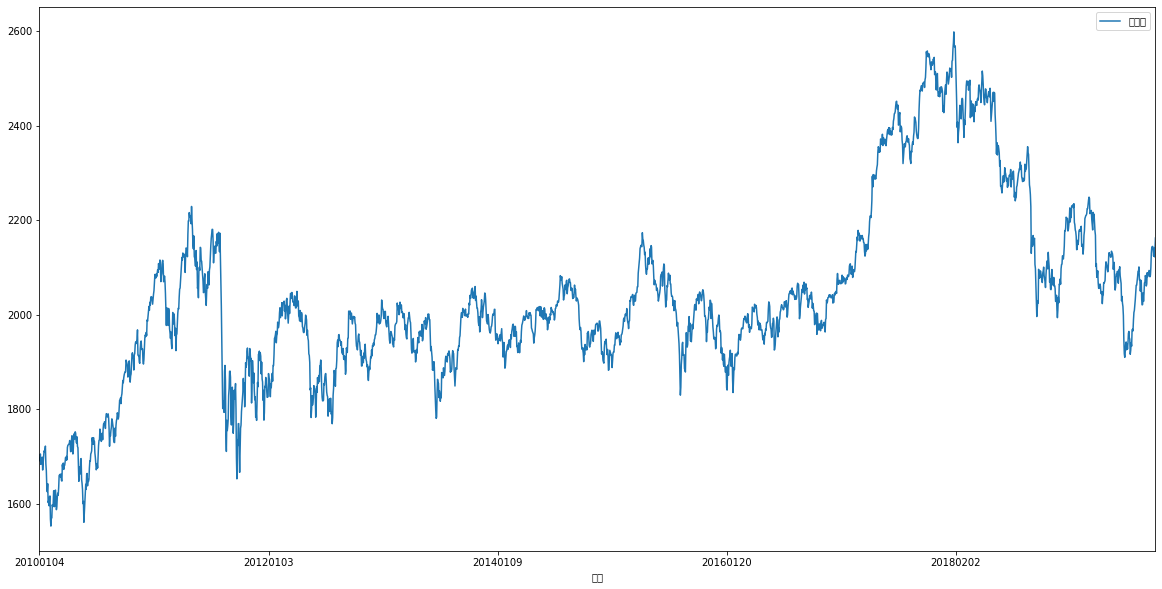

In [0]:
kospi.iloc[:,-1] = kospi_range
kospi = kospi.sort_values(by = ['날짜'])
kospi.plot(x = '날짜',y = '현재가',figsize = (20,10))

In [0]:
import datetime
start_day = datetime.datetime(2010,1,1)
end_day = datetime.datetime(2019,11,16)
days = []
while True:
    days.append(start_day.strftime('%Y%m%d'))
    start_day += datetime.timedelta(days = 1)
    if end_day==start_day:
        break

In [0]:
kos_data = list(kospi.iloc[:].values)
have_kospi_day = kospi.iloc[:,0].to_list()

In [0]:
dic_kospi_data = {}
for i in range(len(days)):
    if days[i] in have_kospi_day:
        index = have_kospi_day.index(days[i])
        dic_kospi_data.update({days[i]:kos_data[index][1:]})
    else:
        dic_kospi_data.update({days[i]:np.array([0,0,0,0,0,0])})

In [0]:
make_data = []
label_data = []
for i in range(len(kospi)):
    index = days.index(kospi.iloc[i,0])
    step_data = np.array([])
    for j in range(index-3,index):
        step_data = np.append(step_data,dic_kospi_data[days[j]])
    make_data.append(list(step_data))
    label_data.append(kospi.iloc[i,1])

In [0]:
new_data = pd.DataFrame(columns=['3days_ago_현재가', '3days_ago_오픈', '3days_ago_고가', '3days_ago_저가', '3days_ago_거래량', '3days_ago_변동 %',
                                '2days_ago_현재가', '2days_ago_오픈', '2days_ago_고가', '2days_ago_저가', '2days_ago_거래량', '2days_ago_변동 %',
                                '1days_ago_현재가', '1days_ago_오픈', '1days_ago_고가', '1days_ago_저가', '1days_ago_거래량', '1days_ago_변동 %'])

In [0]:
make_data = np.array(make_data)

In [0]:
for i in range(18):
    new_data.iloc[:,i] = make_data[:,i]

In [0]:
k = kospi.sort_index(by = ["날짜"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [0]:
k = list(kospi.sort_index(by = ["날짜"])["현재가"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [0]:
new_data["label"] = k

In [0]:
new_data = new_data.iloc[:,:].astype('float')

In [0]:
new_data.corr()["label"].sort_values()

1days_ago_거래량    -0.010006
3days_ago_거래량    -0.009155
2days_ago_거래량    -0.005723
1days_ago_변동 %    0.013756
2days_ago_변동 %    0.017069
3days_ago_변동 %    0.047017
3days_ago_고가      0.103680
3days_ago_오픈      0.104050
3days_ago_현재가     0.104373
3days_ago_저가      0.104920
2days_ago_고가      0.107818
2days_ago_오픈      0.108253
2days_ago_현재가     0.108376
2days_ago_저가      0.109056
1days_ago_고가      0.161140
1days_ago_현재가     0.161847
1days_ago_오픈      0.161923
1days_ago_저가      0.163014
label             1.000000
Name: label, dtype: float64

In [0]:
need_col = ['3days_ago_현재가', '3days_ago_오픈', '3days_ago_고가', '3days_ago_저가','2days_ago_현재가', '2days_ago_오픈', '2days_ago_고가', '2days_ago_저가','1days_ago_현재가', '1days_ago_오픈', '1days_ago_고가', '1days_ago_저가','label']
new_data = new_data.loc[:,need_col]

In [0]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
new_data.loc[:,:-1] = standardscaler.fit_transform(new_data.iloc[:,:-1]) 

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_data.iloc[:,:-1],new_data.iloc[:,-1],test_size = 0.2, random_state = 42)

In [0]:
from sklearn.tree import DecisionTreeRegressor
decision = DecisionTreeRegressor()
decision.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(decision.predict(x_test),y_test)))

37.06462949667049


In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'max_depth' : [3,10,30],'max_features' : [2,3,4,5]}]

grid_tree = GridSearchCV(decision,param_grid,cv = 5, scoring = 'neg_mean_squared_error',
                        return_train_score = True)
grid_tree.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [3, 10, 30],
                          'max_features': [2, 3, 4, 5]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_m

In [0]:
decision = DecisionTreeRegressor(max_features = 4, max_depth = 10)
decision.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=4,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision,x_train,y_train,cv = 5,scoring = "neg_mean_squared_error")

In [0]:
np.sqrt(np.mean(-scores))

41.1293766161104

In [0]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(decision.predict(x_test),y_test)))

37.27789271075601


In [0]:
dic_kospi_data = {}
for i in range(len(days)):
    if days[i] in have_kospi_day:
        index = have_kospi_day.index(days[i])
        dic_kospi_data.update({days[i]:kos_data[index][1:]})

In [0]:
make_data = []
label_data = []
for i in range(len(kospi)):
    if i>3:
        step_data = np.array([])
        for j in range(i-3,i):
            step_data = np.append(step_data,kospi.iloc[i,1:].to_list())
        make_data.append(list(step_data))
        label_data.append(kospi.iloc[i,1])

In [0]:
new_data = pd.DataFrame(columns=['3days_ago_현재가', '3days_ago_오픈', '3days_ago_고가', '3days_ago_저가', '3days_ago_거래량', '3days_ago_변동 %',
                                '2days_ago_현재가', '2days_ago_오픈', '2days_ago_고가', '2days_ago_저가', '2days_ago_거래량', '2days_ago_변동 %',
                                '1days_ago_현재가', '1days_ago_오픈', '1days_ago_고가', '1days_ago_저가', '1days_ago_거래량', '1days_ago_변동 %'])

In [0]:
make_data = np.array(make_data)

In [0]:
for i in range(len(make_data)):
    new_data.loc[i,:] = make_data[i,:]

In [0]:
new_data["label"] = label_data

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text

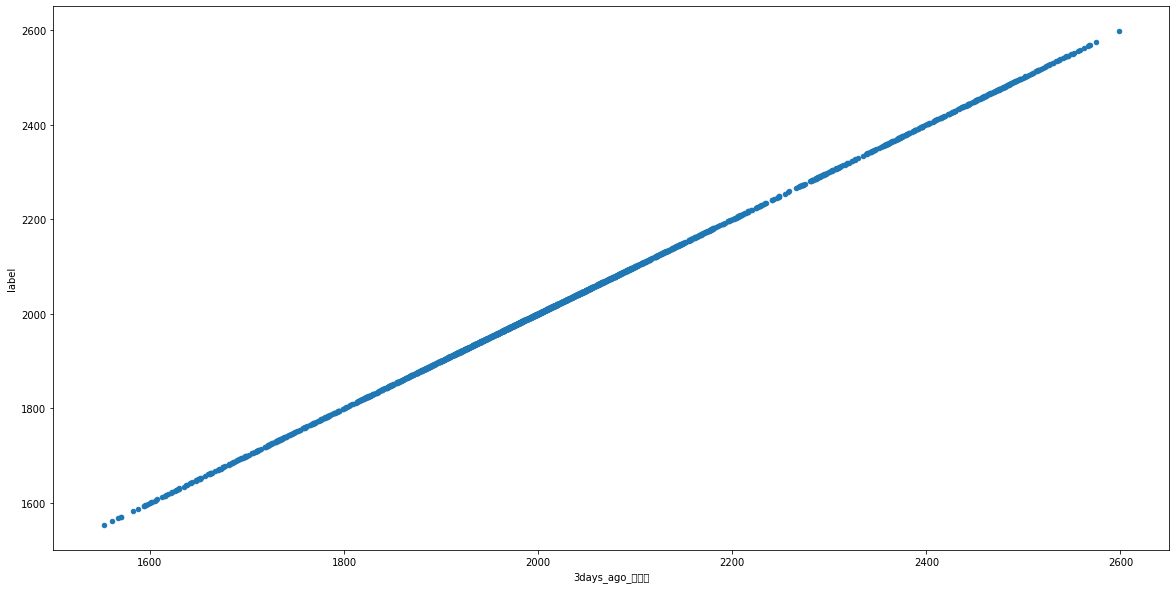

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54536 missing from current font.
  font.set_text(s, 0, flags=flags)


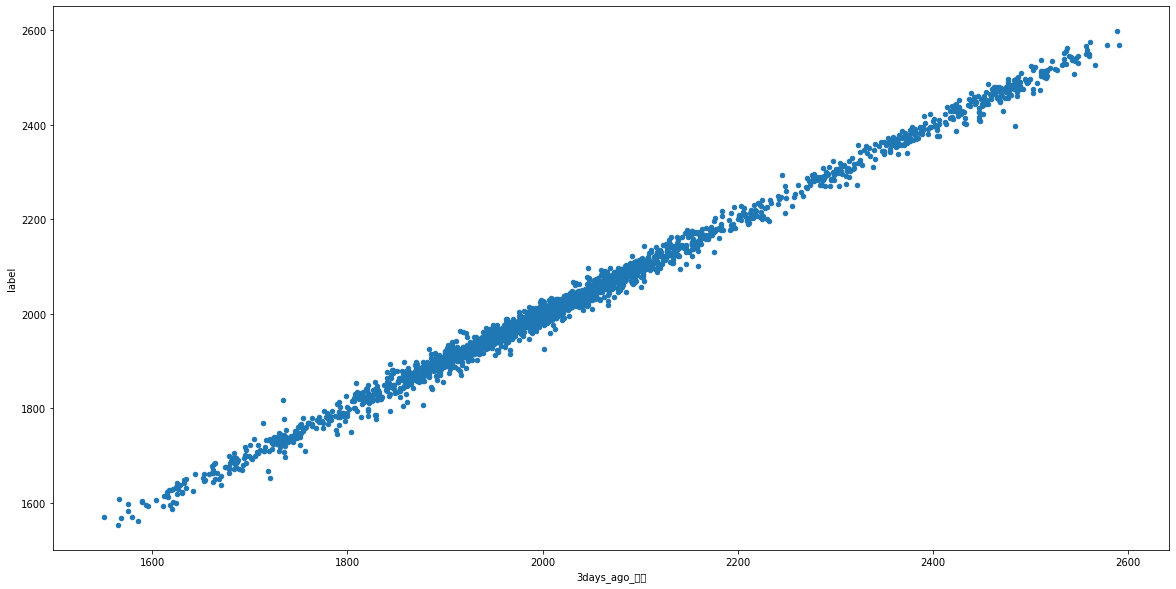

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0, flags=flags)


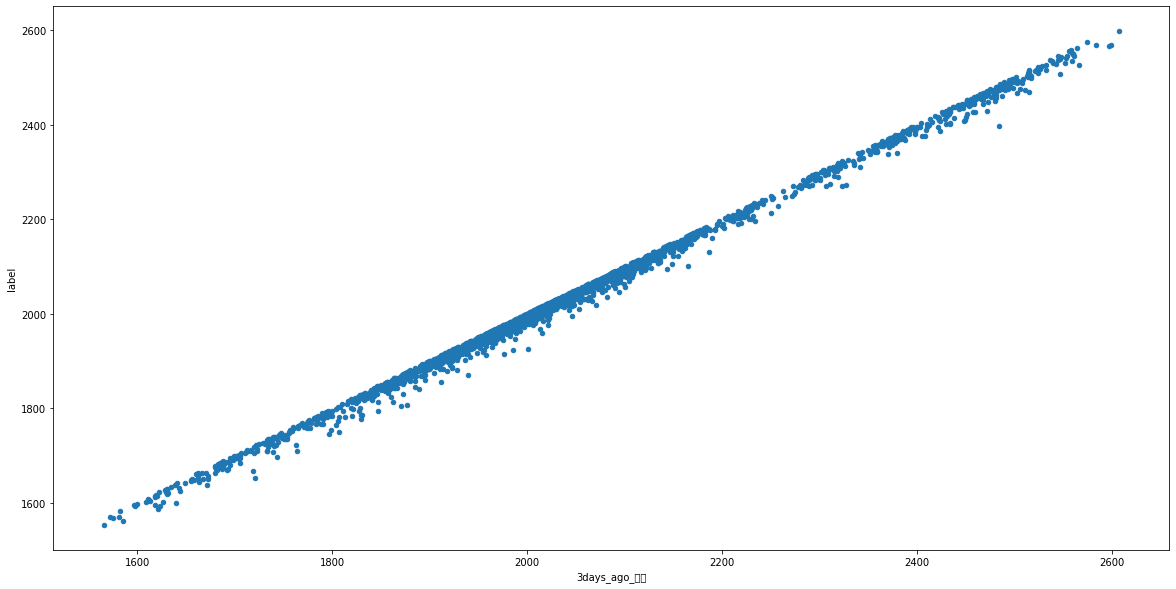

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)


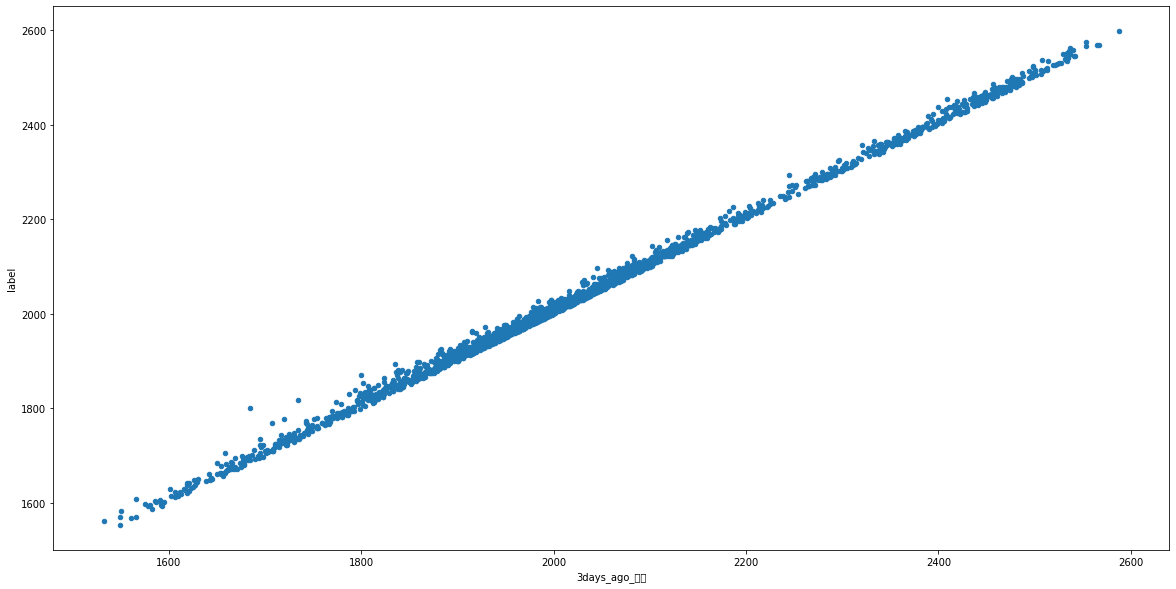

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text

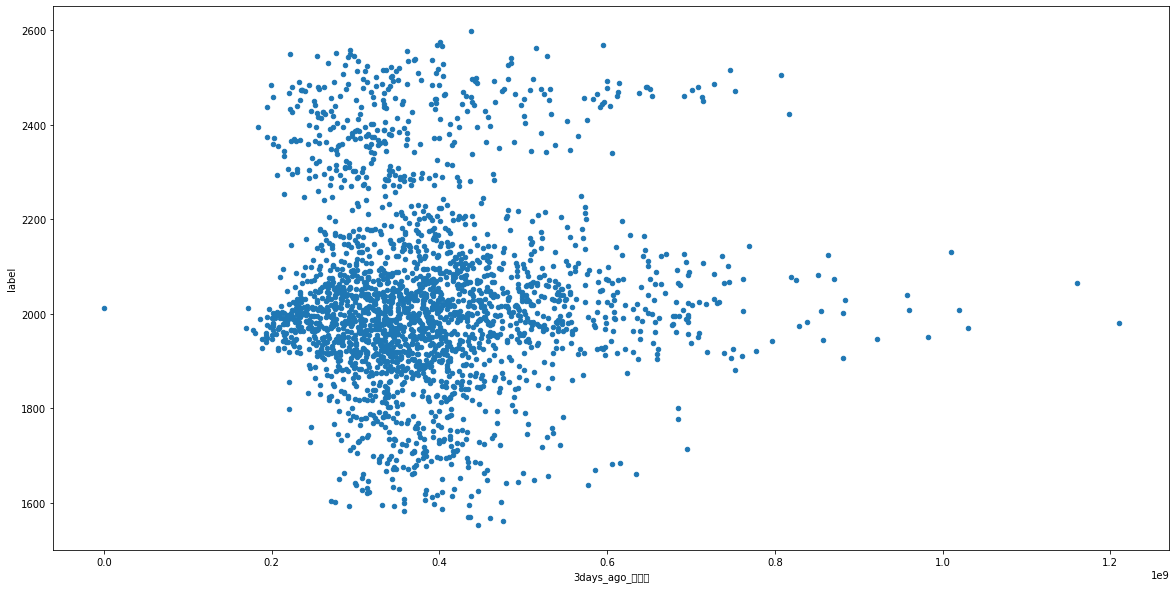

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)


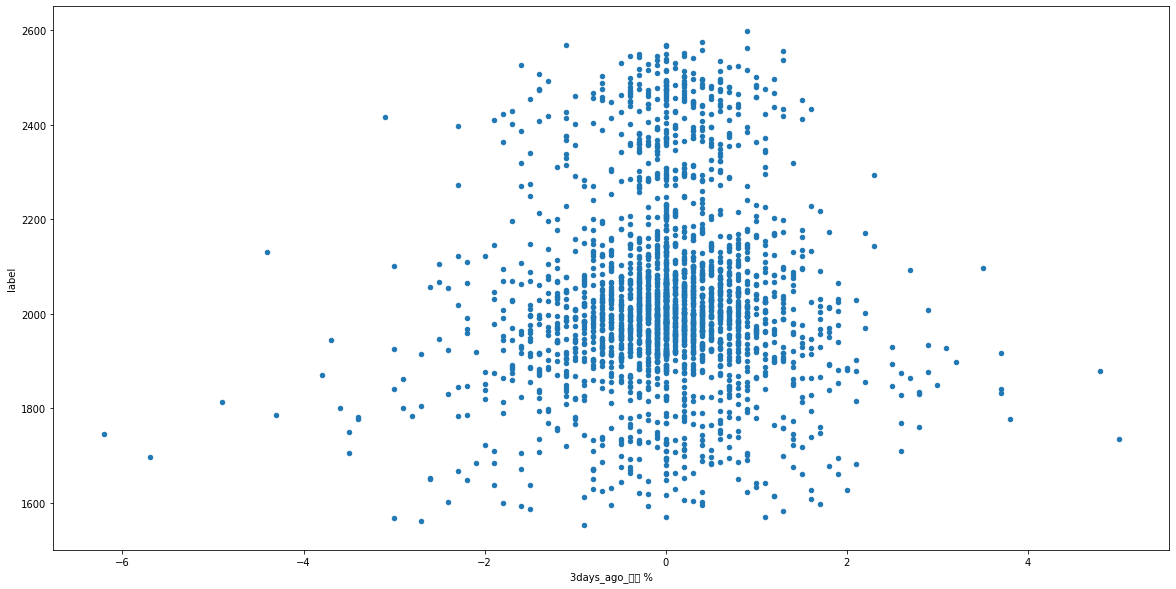

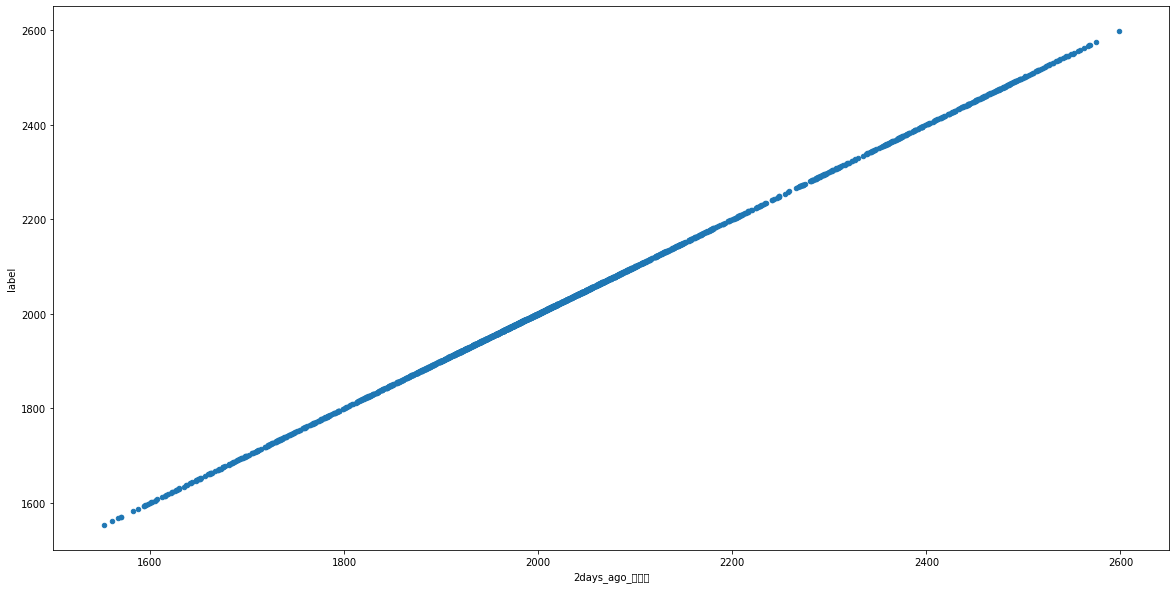

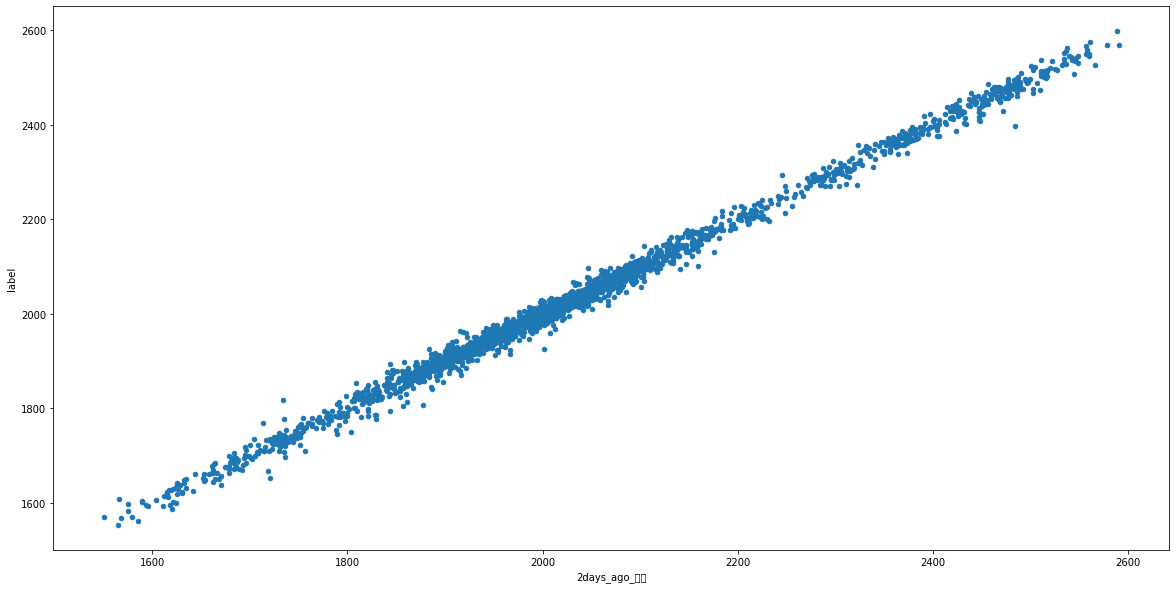

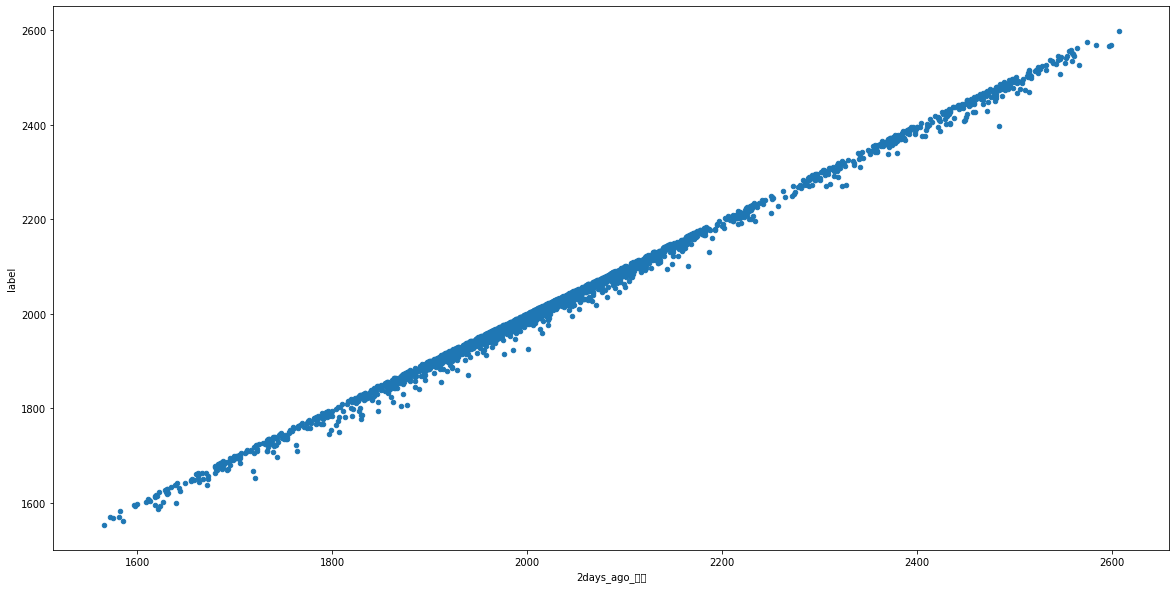

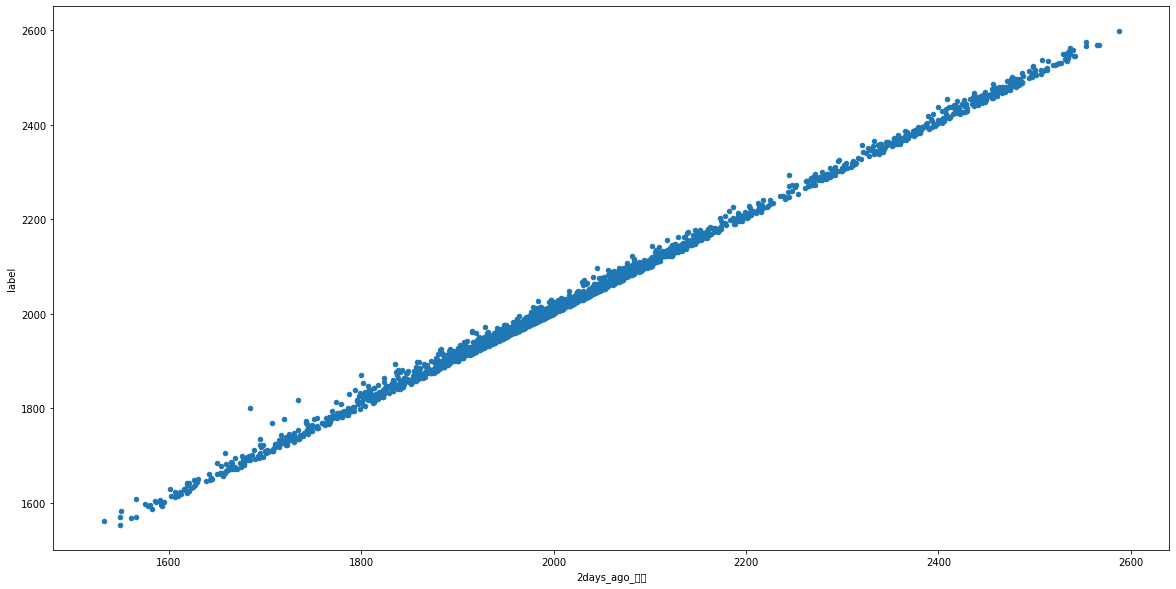

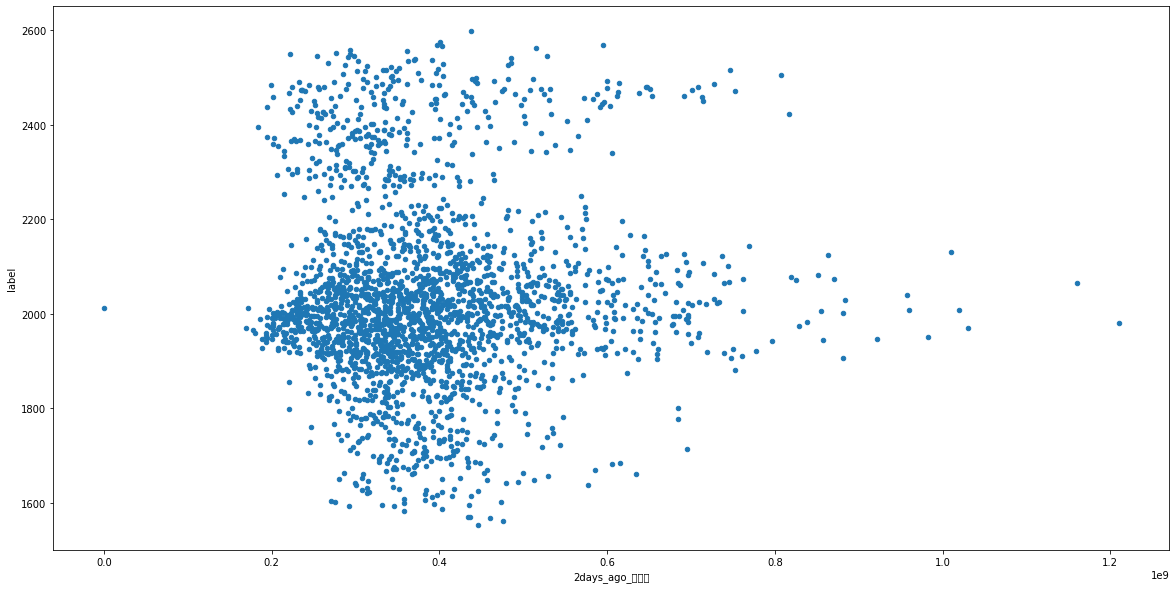

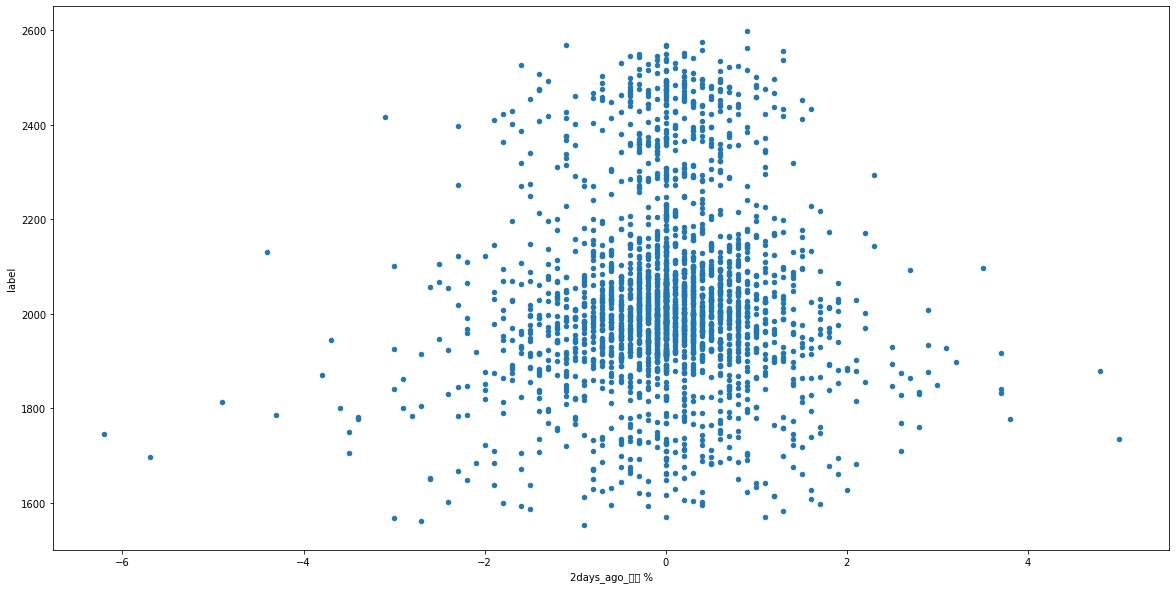

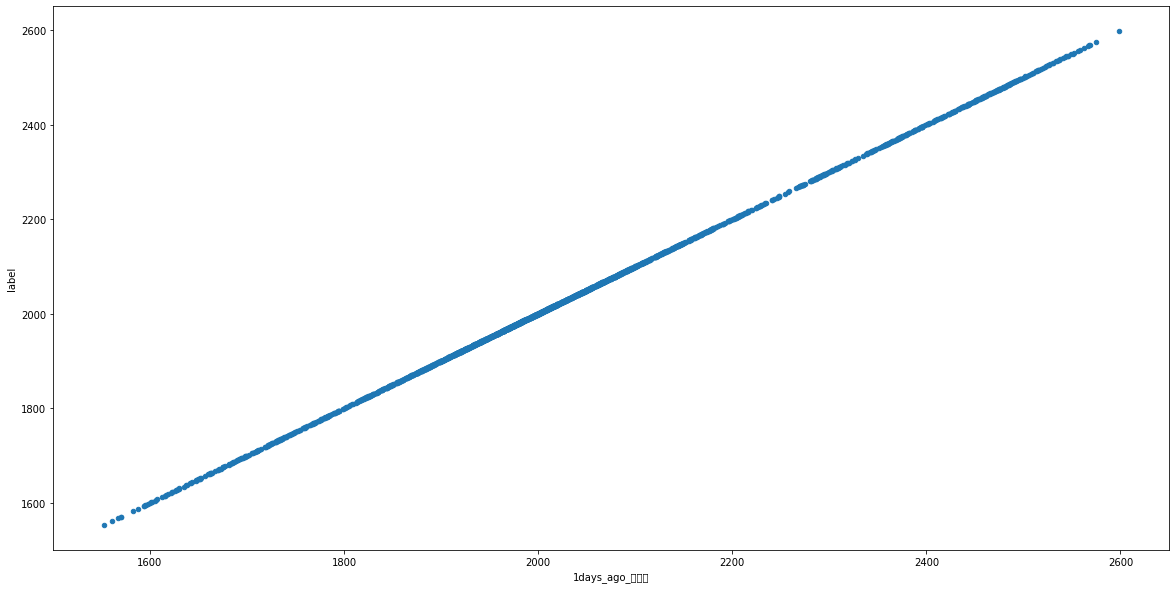

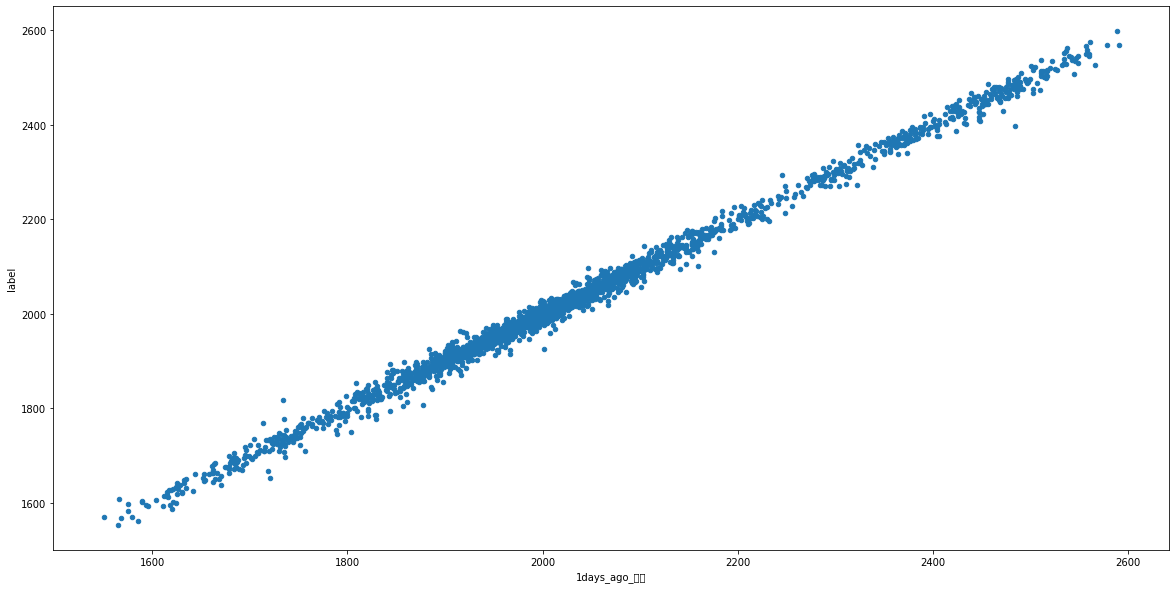

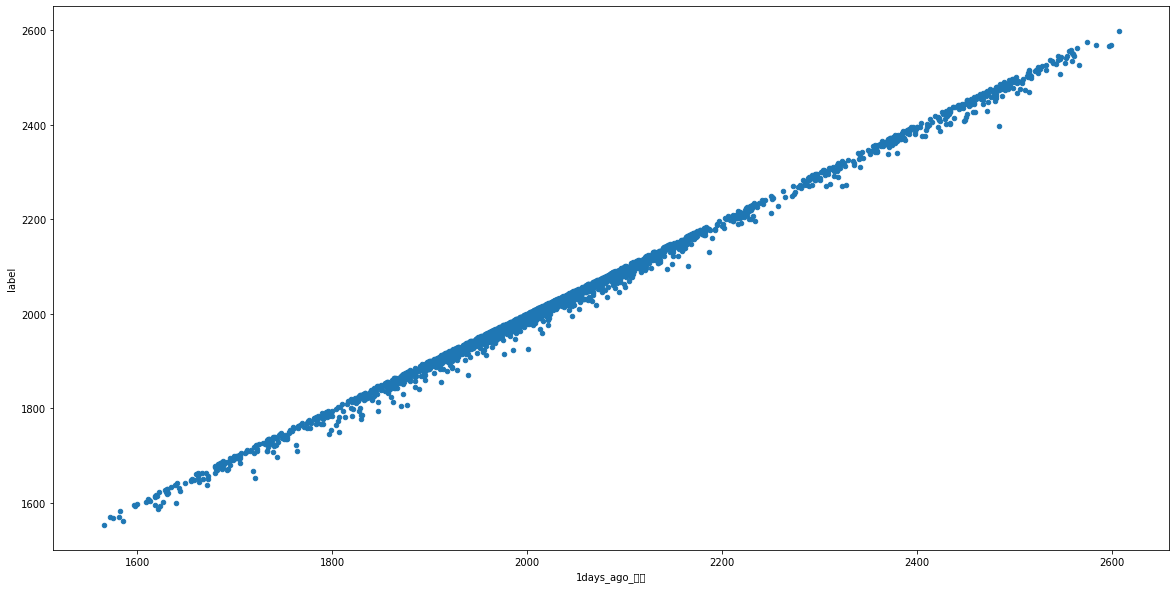

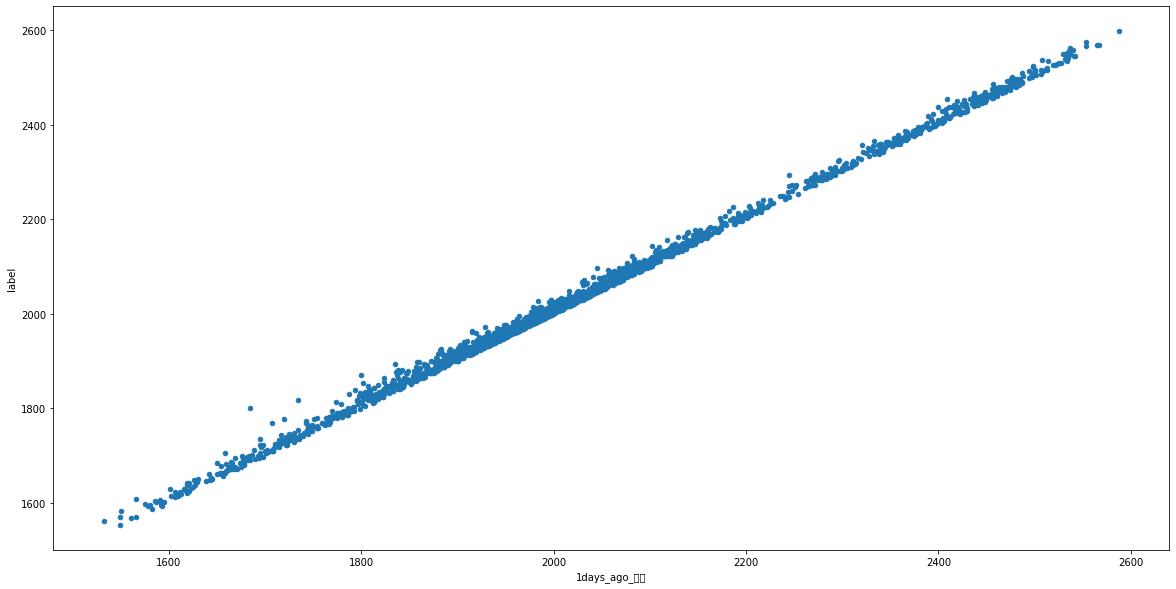

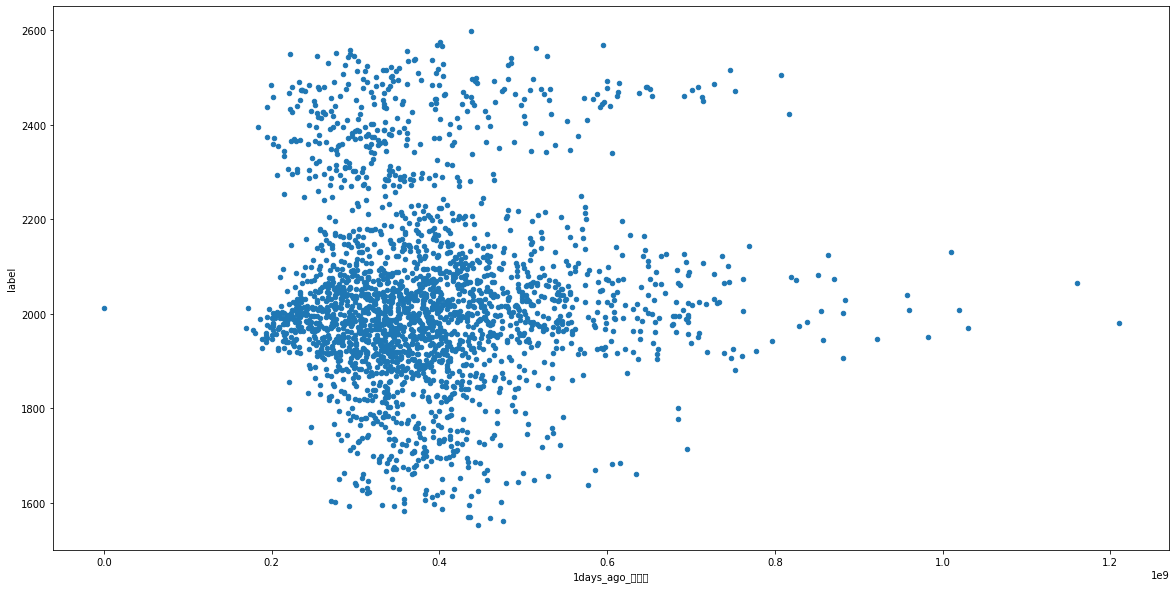

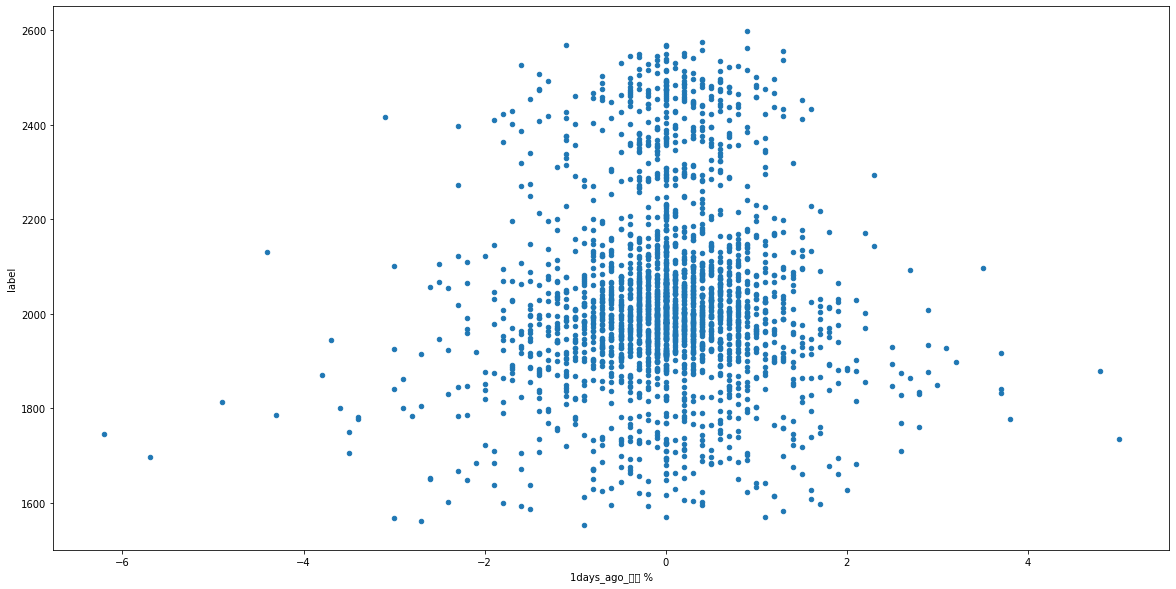

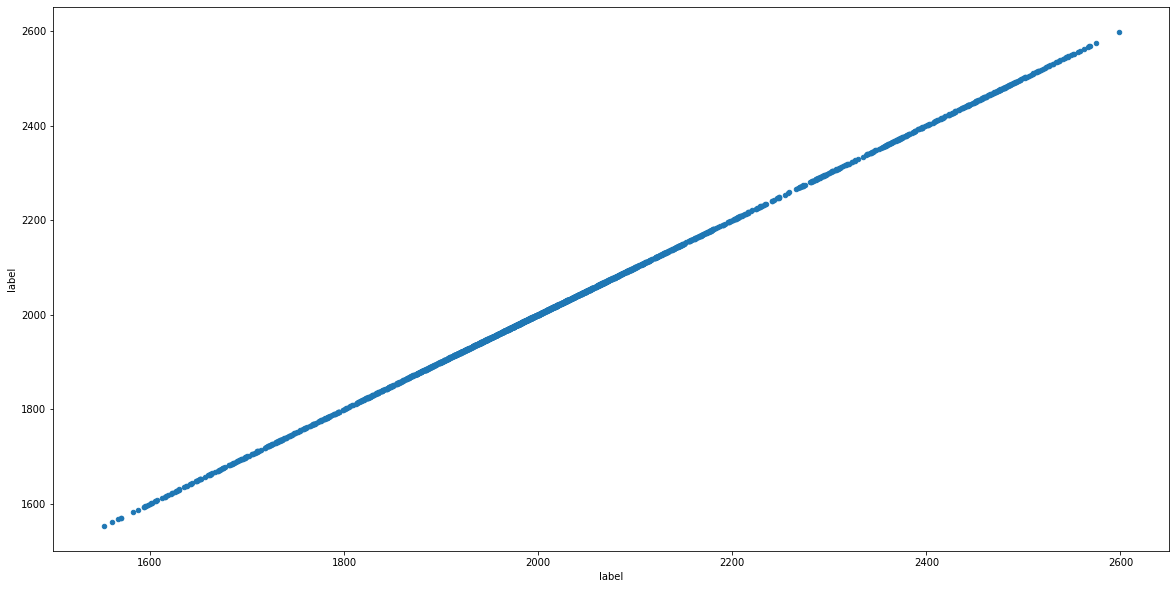

In [0]:
new_data=new_data.loc[:,:].astype('float')
for i in new_data.columns:
    new_data.plot(x = i, y = 'label',kind = 'scatter', figsize = (20,10))

In [0]:
display(new_data)

,3days_ago_현재가,3days_ago_오픈,3days_ago_고가,3days_ago_저가,3days_ago_거래량,3days_ago_변동 %,2days_ago_현재가,2days_ago_오픈,2days_ago_고가,2days_ago_저가,2days_ago_거래량,2days_ago_변동 %,1days_ago_현재가,1days_ago_오픈,1days_ago_고가,1days_ago_저가,1days_ago_거래량,1days_ago_변동 %,label
0,1695.26,1694.06,1695.26,1668.84,379950000.0,0.7,1695.26,1694.06,1695.26,1668.84,379950000.0,0.7,1695.26,1694.06,1695.26,1668.84,379950000.0,0.7,1695.26
1,1694.12,1700.79,1705.73,1694.12,407680000.0,-0.0,1694.12,1700.79,1705.73,1694.12,407680000.0,-0.0,1694.12,1700.79,1705.73,1694.12,407680000.0,-0.0,1694.12
2,1698.64,1695.83,1701.16,1683.29,383760000.0,0.2,1698.64,1695.83,1701.16,1683.29,383760000.0,0.2,1698.64,1695.83,1701.16,1683.29,383760000.0,0.2,1698.64
3,1671.41,1683.51,1687.58,1671.11,361930000.0,-1.6,1671.41,1683.51,1687.58,1671.11,361930000.0,-1.6,1671.41,1683.51,1687.58,1671.11,361930000.0,-1.6,1671.41
4,1685.77,1680.68,1692.78,1677.46,433750000.0,0.8,1685.77,1680.68,1692.78,1677.46,433750000.0,0.8,1685.77,1680.68,1692.78,1677.46,433750000.0,0.8,1685.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,2124.09,2139.07,2139.07,2119.07,617270000.0,-0.6,2124.09,2139.07,2139.07,2119.07,617270000.0,-0.6,2124.09,2139.07,2139.07,2119.07,617270000.0,-0.6,2124.09
2429,2140.92,2131.26,2140.94,2121.80,610430000.0,0.7,2140.92,2131.26,2140.94,2121.80,610430000.0,0.7,2140.92,2131.26,2140.94,2121.80,610430000.0,0.7,2140.92
2430,2122.45,2132.48,2133.37,2118.67,664360000.0,-0.8,2122.45,2132.48,2133.37,2118.67,664360000.0,-0.8,2122.45,2132.48,2133.37,2118.67,664360000.0,-0.8,2122.45
2431,2139.23,2127.54,2139.23,2121.32,521110000.0,0.7,2139.23,2127.54,2139.23,2121.32,521110000.0,0.7,2139.23,2127.54,2139.23,2121.32,521110000.0,0.7,2139.23


In [0]:
new_data.corr()["label"]

3days_ago_현재가     1.000000
3days_ago_오픈      0.997305
3days_ago_고가      0.998659
3days_ago_저가      0.998944
3days_ago_거래량     0.001289
3days_ago_변동 %    0.037758
2days_ago_현재가     1.000000
2days_ago_오픈      0.997305
2days_ago_고가      0.998659
2days_ago_저가      0.998944
2days_ago_거래량     0.001289
2days_ago_변동 %    0.037758
1days_ago_현재가     1.000000
1days_ago_오픈      0.997305
1days_ago_고가      0.998659
1days_ago_저가      0.998944
1days_ago_거래량     0.001289
1days_ago_변동 %    0.037758
label             1.000000
Name: label, dtype: float64

In [0]:
need_col = ['3days_ago_현재가', '3days_ago_오픈', '3days_ago_고가', '3days_ago_저가','2days_ago_현재가', '2days_ago_오픈', '2days_ago_고가', '2days_ago_저가','1days_ago_현재가', '1days_ago_오픈', '1days_ago_고가', '1days_ago_저가','label']
new_data = new_data.loc[:,need_col]

In [0]:
new_data.iloc[:,:-1] = standardscaler.fit_transform(new_data.iloc[:,:-1])

In [0]:
from sklearn.ensemble import RandomForestRegressor
decision = RandomForestRegressor()
decision.fit(x_train,y_train)
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(decision.predict(x_test),y_test)))
from sklearn.model_selection import GridSearchCV
param_grid = [{'max_depth' : [3,10,30],'max_features' : [2,3,4,5]}]

grid_tree = GridSearchCV(decision,param_grid,cv = 5, scoring = 'neg_mean_squared_error',
                        return_train_score = True)
print(np.mean(cross_val_score(decision,x_test,y_test,cv = 5,scoring = 'neg_mean_squared_error')))
grid_tree.fit(x_train,y_train)
print(grid_tree.best_params_)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(grid_tree.predict(ㅌ_),y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


32.68865858782006
-1658.0396793719933
{'max_depth': 10, 'max_features': 5}


33.70166404808933

In [0]:
from sklearn.tree import DecisionTreeRegressor
decision = RandomForestRegressor(max_depth = 30, max_features = 5)
decision.fit(x_train,y_train)
print(np.sqrt(mean_squared_error(decision.predict(x_test),y_test)))

33.05055459351913


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import csv
from konlpy.tag import Kkma
import re

f = open("경제.csv",'r',encoding = 'utf16')
rdr = csv.reader(f)
title_date = []#각 뉴스별 날짜 저장
title = []#각 뉴스별 제목 저장
max_len = 0
word_dictionary = set()
kkma = Kkma()
for i,line in enumerate(rdr):
    if i == 0:
        continue
    tit = kkma.morphs(line[1])
    max_len = max_len if max_len > len(tit) else len(tit)
    word_dictionary.update(tit)
    title_date.append(line[0])
    title.append(tit)
f.close()

word_dictionary = ['<p>'] + list(word_dictionary)
word_dictionary = {word:i for i,word in enumerate(word_dictionary)}

for i in range(len(title)):
    for j in range(len(title[i])):
        title[i][j] = word_dictionary[title[i][j]]

date_set = set(title_date)
date_set = sorted(date_set)
dic_date_title = {day : [] for day in date_set} 
# 날짜와 그에대한 뉴스제목으로 연결된 딕셔너리

idx = 0
for day in date_set:
    for i in range(idx,len(title_date)):
        if day != title_date[i]:
            idx  += 1
            break
        dic_date_title[day].append(title[i])
        idx  += 1
kospi_data = pd.read_csv("코스피지수 내역 (2).csv")
the_date = kospi_data["날짜"].to_list()
for i in range(len(the_date)):
    day = the_date[i][:4] + the_date[i][6:8] + the_date[i][10:12] 
    the_date[i] = day
    kospi_data["날짜"] = the_date


for i in range(len(kospi_data)):
    kospi_data.iloc[i]["현재가"] = float(re.sub(',','',kospi_data.iloc[i]["현재가"]))
    kospi_data.iloc[i]["오픈"] = float(re.sub(',','',kospi_data.iloc[i]["오픈"]))
    kospi_data.iloc[i]["고가"] = float(re.sub(',','',kospi_data.iloc[i]["고가"]))
    kospi_data.iloc[i]["저가"] = float(re.sub(',','',kospi_data.iloc[i]["저가"]))
    k_or_m = 0
    if kospi_data.iloc[i]["거래량"][-1] == 'M' :
        k_or_m = 1000000
    elif kospi_data.iloc[i]["거래량"][-1] == 'K':
        k_or_m = 1000
    else:
        k_or_m = 1000000000
    kospi_data.iloc[i]["거래량"] = float(kospi_data.iloc[i]["거래량"][:-1])*k_or_m
    kospi_data.iloc[i]["변동 %"] = float(kospi_data.iloc[i]["변동 %"][:-1])
# 코스피 가격중 거래량 표현을 변환하기 위한 코드

kospi_num = kospi_data.loc[:,"현재가":"변동 %"].to_numpy() 
#날짜 데이터를 지우기 위한 방법 

from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler()
kospi_data.loc[:,"오픈":"변동 %"] = stand_scaler.fit_transform(kospi_data.loc[:,'오픈':'변동 %'])

#코스피 가격 데이터를 노멀라이징
input_title = {}
for title in dic_date_title:
    step_title = []
    first_data,second_data,third_data,fourth_data = [],[],[],[]
    for i in range(5):
        first_data += dic_date_title[title][0 + 5*i]
        second_data += dic_date_title[title][1 + 5*i]
        third_data += dic_date_title[title][2 + 5*i]
        fourth_data += dic_date_title[title][3 + 5*i]
    step_title = [first_data,second_data,third_data,fourth_data]
    input_title.update({title : step_title})

for_pad_data = [ti for day in input_title for ti in input_title[day]]

max_len = 0
for ti in for_pad_data:
    max_len = max_len if max_len > len(ti) else len(ti)

input_title = {}
for title in dic_date_title:
    step_title = []
    first_data,second_data,third_data,fourth_data = [],[],[],[]
    for i in range(5):
        first_data += dic_date_title[title][0 + 5*i]
        second_data += dic_date_title[title][1 + 5*i]
        third_data += dic_date_title[title][2 + 5*i]
        fourth_data += dic_date_title[title][3 + 5*i]
    
    first_data += [0]*(max_len - len(first_data))
    second_data += [0] * (max_len - len(second_data))
    third_data += [0] * (max_len - len(third_data))
    fourth_data += [0] * (max_len - len(fourth_data))
    
    step_title = [first_data,second_data,third_data,fourth_data]
    input_title.update({title : step_title})
# first ~ fourth로 데이터를 증폭하기 위한 방법: 모든 날짜는 [0,5,10,15,20,25] [1,6,11,16,21,27,...] ... 로 나누어져 있다.
label = kospi_data.loc[:,list(kospi_data.columns)].values[:,:2] # kospi data와 현재가로 이루어진 array
# kospi_input_data = {ko[0]:ko[1:] for ko in want_kospi}
kospi_output_data = {ko[0]:ko[1] for ko in label}
input_title_data = []
input_kospi_data = []
output_kospi_data = []
the_date = list(dic_date_title.keys())

for i,day in enumerate(kospi_output_data):
    _input1 = []
    _input2 = []
    _input3 = []
    _input4 = []
    kospi_input = []
    index = the_date.index(day)
    for d in list(dic_date_title.keys())[index-3:index]:
        _input1.append(input_title[d][0])
        _input2.append(input_title[d][1])
        _input3.append(input_title[d][2])
        _input4.append(input_title[d][3])
    output_kospi_data.append(kospi_output_data[day])
    output_kospi_data.append(kospi_output_data[day])
    output_kospi_data.append(kospi_output_data[day])
    output_kospi_data.append(kospi_output_data[day])
    
    input_title_data.append(_input1)
    input_title_data.append(_input2)
    input_title_data.append(_input3)
    input_title_data.append(_input4)
    #input_kospi_data.append(kospi_input*4)
#     output_kospi_data = []
input_title_data = np.array(input_title_data)
output_kospi_data = np.array(output_kospi_data)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_title_data, output_kospi_data, test_size = 0.2, random_state = 42)

from keras.layers import GRU, Dense, Concatenate, Embedding, Flatten, Input, Dropout, Lambda
from keras.models import Model
from keras.callbacks import Callback

title_input = Input((3,250,))

first_day_input = Lambda(lambda x : x[:,0])(title_input)
second_day_input = Lambda(lambda x : x[:,1])(title_input)
third_day_input = Lambda(lambda x : x[:,2])(title_input)

embedding_layer = Embedding(len(word_dictionary),200)

embedding_first_day = embedding_layer(first_day_input)
embedding_second_day = embedding_layer(second_day_input)
embedding_third_day = embedding_layer(third_day_input)

first_gru_output = GRU(128,return_sequences = True)(embedding_first_day)
second_gru_output = GRU(128,return_sequences = True)(embedding_second_day)
third_gru_output = GRU(128, return_sequences = True)(embedding_third_day)

flatten_first_gru = Flatten()(first_gru_output)
flatten_second_gru = Flatten()(second_gru_output)
flatten_third_gru = Flatten()(third_gru_output)

first_dense_output = Dense(200,activation = 'relu')(flatten_first_gru)
second_dense_output = Dense(200,activation = 'relu')(flatten_second_gru)
third_dense_output = Dense(200,activation = 'relu')(flatten_third_gru)

concat_output = Concatenate()([first_dense_output,second_dense_output,third_dense_output])
concat_dense = Dense(200,activation = 'relu')(concat_output)

last_output = Dense(1,activation = 'linear')(concat_dense)

from keras.layers import LSTM, Dense, Concatenate, Embedding, Flatten, Input, Dropout, Lambda,RepeatVector
from keras.models import Model
from keras.callbacks import Callback

title_input = Input((3,250,))
kospi_input = Input((3,6,))

first_day_input = Lambda(lambda x : x[:,0])(title_input)
second_day_input = Lambda(lambda x : x[:,1])(title_input)
third_day_input = Lambda(lambda x : x[:,2])(title_input)

embedding_layer = Embedding(len(word_dictionary),200)

embedding_first_day = embedding_layer(first_day_input)
embedding_second_day = embedding_layer(second_day_input)
embedding_third_day = embedding_layer(third_day_input)


first_gru_output = LSTM(128,return_sequences = True)(embedding_first_day)
second_gru_output = LSTM(128,return_sequences = True)(embedding_second_day)
third_gru_output = LSTM(128, return_sequences = True)(embedding_third_day)

flatten_first_gru = Flatten()(first_gru_output)
flatten_second_gru = Flatten()(second_gru_output)
flatten_third_gru = Flatten()(third_gru_output)

first_dense_output = Dense(200,activation = 'relu')(flatten_first_gru)
second_dense_output = Dense(200,activation = 'relu')(flatten_second_gru)
third_dense_output = Dense(200,activation = 'relu')(flatten_third_gru)

concat_output = Concatenate()([first_dense_output,second_dense_output,third_dense_output])
concat_dense = Dense(200,activation = 'relu')(concat_output)

last_output = Dense(1,activation = 'linear')(concat_dense)

model = Model([title_input],last_output)
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()
from keras.callbacks import Callback
model.fit([x_train],y_train,batch_size = 128, epochs = 10, validation_split = 0.2)

np.sqrt(model.evaluate([x_test],y_test))


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 3, 250)       0                                            
__________________________________________________________________________________________________
lambda_10 (Lambda)              (None, 250)          0           input_5[0][0]                    
__________________________________________________________________________________________________
lambda_11 (Lambda)              (None, 250)          0           input_5[0][0]                    
__________________________________________________________________________________________________
lambda_12 (Lambda)              (None, 250)          0           input_5[0][0]                    
___________________________________________________________________________________________

111.0245544314352